**Importing Libraries and Loading Data**

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [44]:
datmark_path = '/content/marketing_campaign.csv'
datmarkcust = pd.read_csv(datmark_path,delimiter='\t')
print(datmarkcust.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

**Data Cleaning and Feature Engineering**

In [46]:
missing_info = datmarkcust.isnull().sum().sort_values(ascending=False)
print("Missing values per column:\n", missing_info)
data_no_na = datmarkcust.dropna()
data_unique = data_no_na.drop_duplicates()
if 'Dt_Customer' in data_unique.columns:
    data_unique['Dt_Customer'] = pd.to_datetime(data_unique['Dt_Customer'], errors='coerce')
print("Columns in data_unique:\n", data_unique.columns)

if 'Education' in data_unique.columns:
    print("Unique values in 'Education':\n", data_unique['Education'].unique())
    data_unique['Education_Factor'], _ = pd.factorize(data_unique['Education'])
else:
    print("'Education' column does not exist in data_unique.")
if 'Marital_Status' in data_unique.columns:
    print("Unique values in 'Marital_Status':\n", data_unique['Marital_Status'].unique())
    data_unique['Marital_Factor'], _ = pd.factorize(data_unique['Marital_Status'])
else:
    print("'Marital_Status' column does not exist in data_unique.")
data_final = data_unique.drop(columns=['Education', 'Marital_Status'], errors='ignore')
print("Summary statistics of numerical features:\n", data_final.describe())
print("Updated DataFrame Info:\n", data_final.info())
print("Sample of the cleaned DataFrame:\n", data_final.head())


Missing values per column:
 Income                 24
ID                      0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Response                0
dtype: int64
Columns in data_unique:
 Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntF

**Exploratory Data Analysis (EDA)**

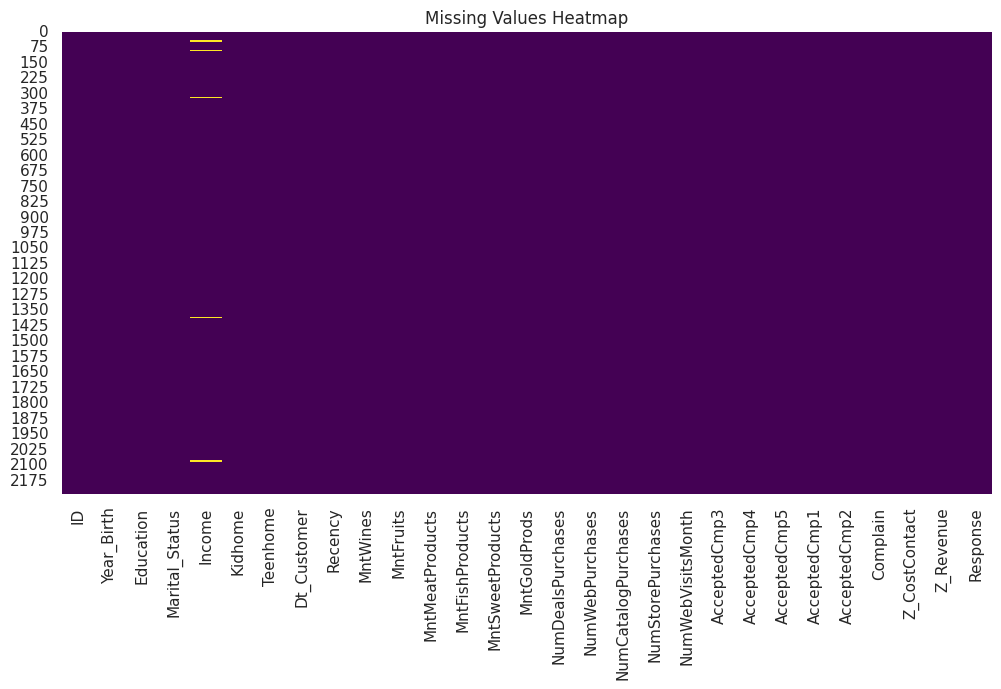

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
datmark_path = '/content/marketing_campaign.csv'
datmarkcust = pd.read_csv(datmark_path, delimiter='\t')
plt.figure(figsize=(12, 6))
sns.heatmap(datmarkcust.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()



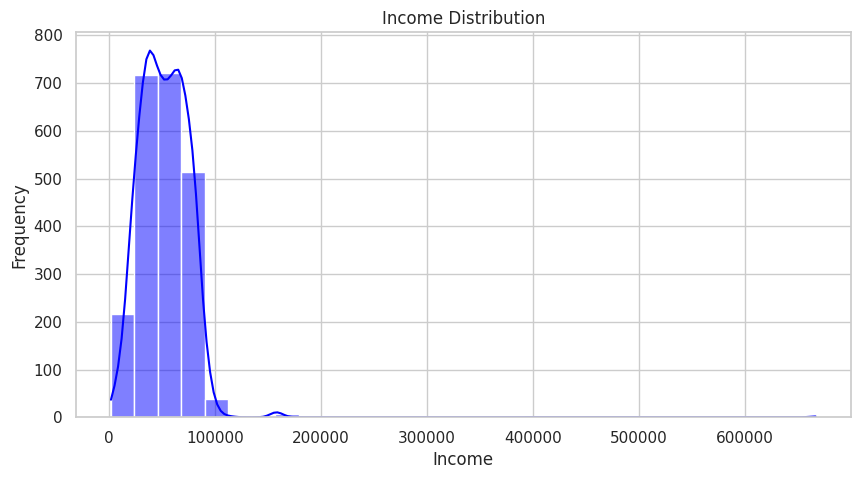

In [55]:
plt.figure(figsize=(10, 5))
sns.histplot(datmarkcust['Income'], bins=30, kde=True, color='blue')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

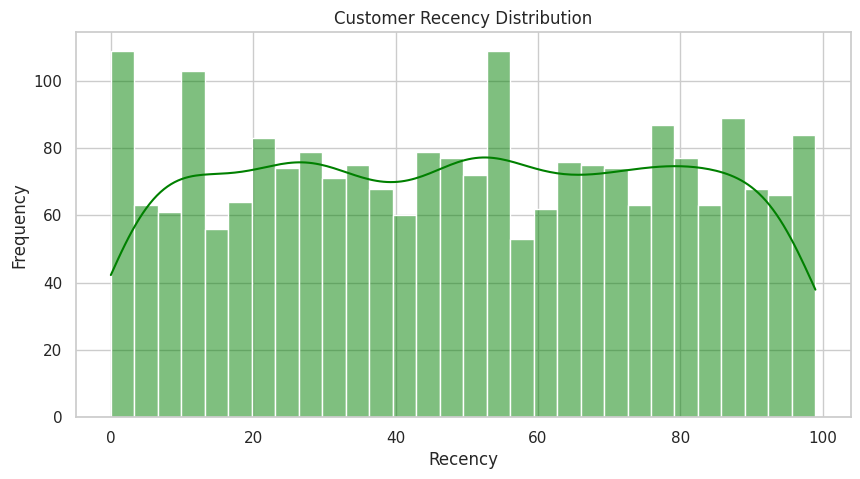

In [56]:
plt.figure(figsize=(10, 5))
sns.histplot(datmarkcust['Recency'], bins=30, kde=True, color='green')
plt.title('Customer Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

<ipython-input-57-7be6eee5cf71>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=datmarkcust, x='Education', palette='Set2', order=datmarkcust['Education'].value_counts().index)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_bas

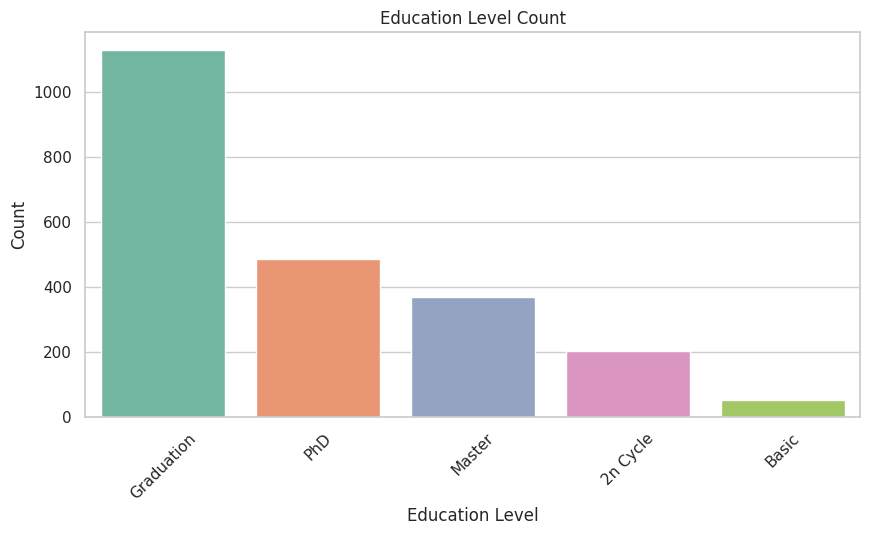

In [57]:
plt.figure(figsize=(10, 5))
sns.countplot(data=datmarkcust, x='Education', palette='Set2', order=datmarkcust['Education'].value_counts().index)
plt.title('Education Level Count')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



<ipython-input-58-83779c9f7f78>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=datmarkcust, x='Marital_Status', palette='Set3')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a le

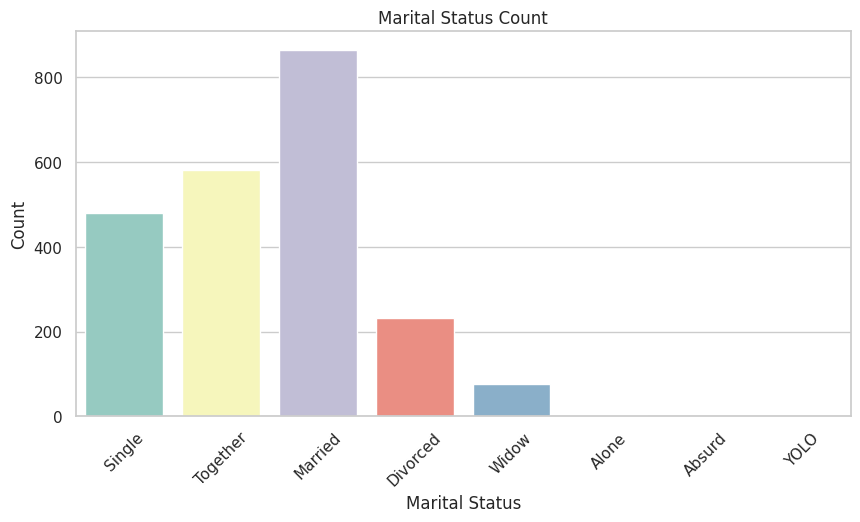

In [58]:
plt.figure(figsize=(10, 5))
sns.countplot(data=datmarkcust, x='Marital_Status', palette='Set3')
plt.title('Marital Status Count')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


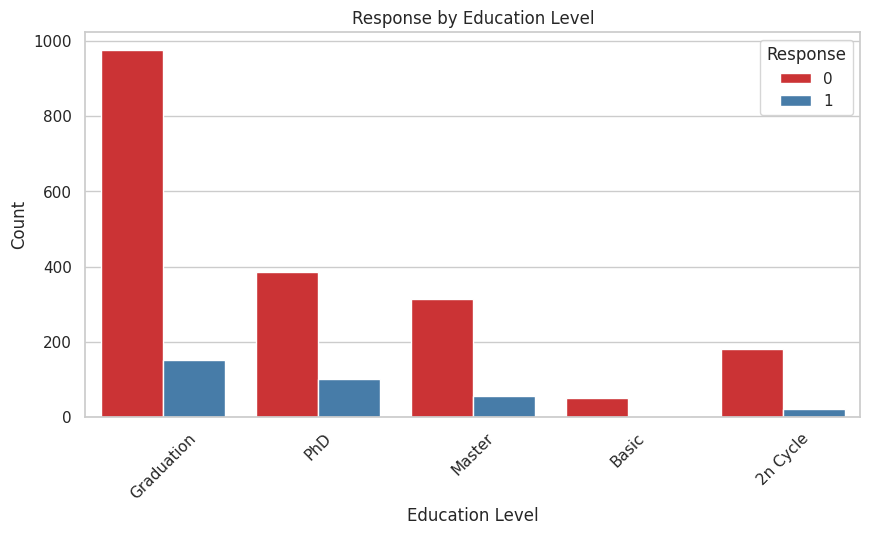

In [59]:
plt.figure(figsize=(10, 5))
sns.countplot(data=datmarkcust, x='Education', hue='Response', palette='Set1')
plt.title('Response by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title="Response", loc='upper right')
plt.show()

**Data Preprocessing**

In [69]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

datmark_path = '/content/marketing_campaign.csv'
# Changed the delimiter to tab
datmarkcust = pd.read_csv(datmark_path, delimiter='\t')

print("Initial data information:")
print(datmarkcust.info())

datmarkcust.columns = datmarkcust.columns.str.strip()
print("\nNumber of duplicate rows before removal:", datmarkcust.duplicated().sum())
datmarkcust.drop_duplicates(inplace=True)
print("Number of duplicate rows after removal:", datmarkcust.duplicated().sum())

print("\nMissing values in each column:")
print(datmarkcust.isnull().sum())
datmarkcust.dropna(inplace=True)

print("\nData types before conversion:")
print(datmarkcust.dtypes)

datmarkcust['Income'] = pd.to_numeric(datmarkcust['Income'], errors='coerce')
datmarkcust['Recency'] = pd.to_numeric(datmarkcust['Recency'], errors='coerce')
datmarkcust['Dt_Customer'] = pd.to_datetime(datmarkcust['Dt_Customer'], errors='coerce')

datmarkcust = pd.get_dummies(datmarkcust, columns=['Education', 'Marital_Status'], drop_first=True)

numeric_columns = ['Income', 'Recency', 'MntWines', 'MntFruits',
                   'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                   'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                   'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                   'Z_CostContact', 'Z_Revenue']

scaler = StandardScaler()
datmarkcust[numeric_columns] = scaler.fit_transform(datmarkcust[numeric_columns])

print("\nCleaned and Preprocessed Data:")
print(datmarkcust.head())
print("\nFinal data information after preprocessing:")
print(datmarkcust.info())

Initial data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurc

PCA

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
datmark_path = '/content/marketing_campaign.csv'  # Update the path if necessary
datmarkcust = pd.read_csv(datmark_path, delimiter=',')  # Adjust delimiter if needed

# Strip any leading/trailing spaces from the column names
datmarkcust.columns = datmarkcust.columns.str.strip()

# Check available columns
print("Available columns in datmarkcust:")
print(datmarkcust.columns.tolist())

# Define numeric columns for PCA
numeric_columns = ['Income', 'Recency', 'MntWines', 'MntFruits',
                   'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                   'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                   'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                   'Z_CostContact', 'Z_Revenue']

# Check for missing numeric columns
missing_columns = [col for col in numeric_columns if col not in datmarkcust.columns]
if missing_columns:
    print(f"The following columns are missing from datmarkcust: {missing_columns}")
else:
    # Scale the numeric features
    scaler = StandardScaler()
    datmarkcust_scaled = pd.DataFrame(scaler.fit_transform(datmarkcust[numeric_columns]), columns=numeric_columns)

    # Perform PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(datmarkcust_scaled)

    # Add PCA results to the original DataFrame
    datmarkcust['PCA1'] = pca_result[:, 0]
    datmarkcust['PCA2'] = pca_result[:, 1]

    # Plot the PCA results
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x='PCA1', y='PCA2', data=datmarkcust, hue='Response', palette='Set1')
    plt.title('PCA Result')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.legend(title='Response')
    plt.show()


Available columns in datmarkcust:
['ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse']
The following columns are missing from datmarkcust: ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue']


In [100]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
datmark_path = '/content/marketing_campaign.csv'  # Update the path if necessary
datmarkcust = pd.read_csv(datmark_path, delimiter=',')  # Adjust delimiter if needed

# Strip any leading/trailing spaces from the column names
datmarkcust.columns = datmarkcust.columns.str.strip()

In [102]:
from sklearn.cluster import DBSCAN
scaler = StandardScaler()
# Changed 'ad' to 'datmarkcust'
datmarkcust_scaled = scaler.fit_transform(datmarkcust[['PCA1', 'PCA2']])
dbscan = DBSCAN(eps=0.3, min_samples=8)
# Changed 'ad' to 'datmarkcust'
datmarkcust['DBSCAN_Cluster'] = dbscan.fit_predict(datmarkcust_scaled)
plt.figure(figsize=(10, 5))
# Changed 'ad' to 'datmarkcust'
sns.scatterplot(x='PCA1', y='PCA2', data=datmarkcust, hue='DBSCAN_Cluster', palette='Set2', style='DBSCAN_Cluster', markers=['o', 's', 'D', 'X', '*'])
plt.title('DBSCAN Clustering')
plt.xlabel('FIRST Component PCA')
plt.ylabel('SECOND Component PCA')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

KeyError: "None of [Index(['PCA1', 'PCA2'], dtype='object')] are in the [columns]"